### Student Activity: Beta Comparisons

This program reads in the daily closing prices of social media stocks—FB, TWTR, SNAP—and the S&P 500 as CSVs and calculates the rolling 30-day beta values of each social media to plot the trends in volatility relative to the market.

In [1]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob

In [2]:
def combine(directory):
    df_list = []
    for path in glob(directory + "/*csv"):
        df = pd.read_csv(path, 
                         parse_dates=True, 
                         index_col='date', 
                         names=['date', path.split('/')[-1].split('.')[0].split('_')[0].upper()], 
                         header=0)
        df_list.append(df)
    return pd.concat(df_list, axis='columns', join='inner')
combined = combine("../Resources")

In [3]:
returns = combined.pct_change().dropna()
returns.head()

,TWTR,SNAP,SP500,FB
date,,,,
2019-05-16,0.021333,-0.006092,0.005872,0.009120
2019-05-15,-0.010444,-0.066550,-0.008817,-0.003850
2019-05-14,-0.025594,-0.015947,-0.005805,-0.029742
2019-05-13,-0.009207,-0.036225,-0.007952,0.004482
2019-05-10,0.050834,0.037587,0.024727,0.037457


In [4]:
beta_dict = {}
for column in returns.columns:   
    covarience = returns[column].cov(returns['SP500']) 
    varience = returns['SP500'].var()
    beta_dict[column] = covarience / varience
beta_dict

{'TWTR': 1.5193591987729476,
 'SNAP': 1.1525883660496732,
 'SP500': 1.0000000000000002,
 'FB': 1.281859508524622}

In [5]:
def rolling_beta(window=30):    
    beta_dict = {}
    for column in returns.columns:
        covarience = returns[column].rolling(window=window).cov(returns['SP500'].rolling(window=window)) 
        varience = returns['SP500'].rolling(window=window).var()
        beta_dict[column] = covarience / varience
    return beta_dict    

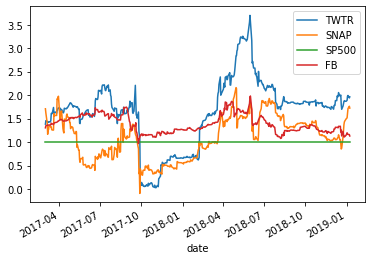

In [6]:
fig, ax = plt.subplots()
beta_dict = rolling_beta(90)
for k, v in beta_dict.items():
    v.plot(ax=ax, label=k)
    plt.legend()